In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('life_expectancy_data.csv', delimiter=',', encoding='utf-8')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
print(f'Shape of the data: {df.shape}')

In [ ]:
print(f'Columns in the dataset:\n\n{list(df.columns)}')

In [ ]:
print(f'Valores nulos en el dataset:\n\n{df.isnull().sum()}')

In [ ]:
print(f'Datos duplicados en el dataset: {df.duplicated().sum()}')

In [ ]:
df.describe()

In [ ]:
df.info()

### Datatype Management

In [ ]:
df = df.astype({'Country': 'string', 'Status': 'string'})
df.info()

### Null Management

In [ ]:
df.fillna(0, inplace=True)
df.info()

### Graphics

In [ ]:
num_data = df.select_dtypes(include=['float64', 'int64'])
correlation = num_data.corr()

plt.figure(figsize=(15, 11))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
plt.plot(df['Measles '], '.-' , label = 'Hepatitis')
plt.show()

In [ ]:
x = df['Year']
bar_width = 0.35
x1 = x - bar_width/2
x2 = x + bar_width/2

plt.bar(x1, df[' thinness 5-9 years'], width=bar_width, label='5-9 years')
plt.bar(x2, df[' thinness  1-19 years'], width=bar_width, label='1-19 years', color='g')
plt.title('Cases of thinness per year')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.grid(True)
plt.legend(loc = 'lower left')
plt.show()

**Frecuencia en la esperanza de vida según el rango de edad**

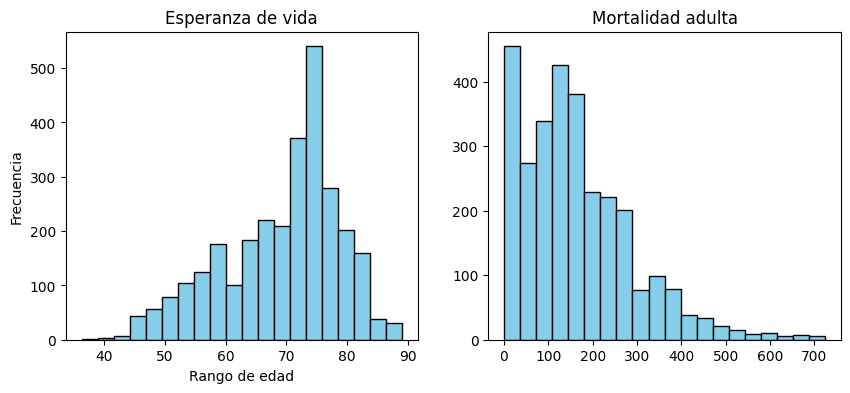

In [6]:
plt.figure(1, figsize= (10, 4))

plt.subplot(1,2,1)
plt.hist(df['Life expectancy '], bins=20, color='skyblue', edgecolor='black')
plt.title('Esperanza de vida')
plt.xlabel('Rango de edad')
plt.ylabel('Frecuencia')

plt.subplot(1,2,2)
plt.hist(df['Adult Mortality'], bins=20, color='skyblue', edgecolor='black')
plt.title('Mortalidad adulta')

plt.show()

**Expectativa de vida a lo largo de los años en función del estado del país.**

In [ ]:
plt.figure(figsize = (12,5))
graphic = sns.lineplot(x = 'Year', y = 'Life expectancy ', hue = 'Status', data=df)
plt.xlabel('Año')
plt.ylabel('Esperanza de vida')
plt.show()


**Porcentaje de datos presentes según estatus del país**

In [ ]:
plt.pie(df['Status'].value_counts(), labels = df['Status'].value_counts().index,
        autopct = '%.2f%%', shadow = False, startangle=90)
plt.show()